Dataset minimal memiliki 1000 sampel.

Harus menggunakan LSTM dalam arsitektur model.

Harus menggunakan model sequential.

Validation set sebesar 20% dari total dataset.

Harus menggunakan Embedding.

Harus menggunakan fungsi tokenizer.

Akurasi dari model minimal 75%.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FV.csv to FV.csv


In [ ]:
import pandas as pd
df = pd.read_csv('FV.csv')

df.head()

,Title,ReviewText,DivisionName
0,Some major design flaws,I had such high hopes for this dress and reall...,General
1,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",General Petite
2,Flattering shirt,This shirt is very flattering to all due to th...,General
3,Not for the very petite,"I love tracy reese dresses, but this one is no...",General
4,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,General Petite


In [ ]:
df = df.drop(columns=['Title'])

df.head()

,ReviewText,DivisionName
0,I had such high hopes for this dress and reall...,General
1,"I love, love, love this jumpsuit. it's fun, fl...",General Petite
2,This shirt is very flattering to all due to th...,General
3,"I love tracy reese dresses, but this one is no...",General
4,I aded this in my basket at hte last mintue to...,General Petite


In [ ]:
category = pd.get_dummies(df.DivisionName)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='DivisionName')
df_baru

,ReviewText,General,General Petite,Initmates
0,I had such high hopes for this dress and reall...,1,0,0
1,"I love, love, love this jumpsuit. it's fun, fl...",0,1,0
2,This shirt is very flattering to all due to th...,1,0,0
3,"I love tracy reese dresses, but this one is no...",1,0,0
4,I aded this in my basket at hte last mintue to...,0,1,0
...,...,...,...,...
995,Ordered these online and they fit perfectly. i...,1,0,0
996,I loved this dress from the moment i tried it ...,0,1,0
997,I went ahead and ordered a size up based on pr...,1,0,0
998,"Love pilcro, love the stripes and the length -...",1,0,0


In [ ]:
sinopsis = df_baru['ReviewText'].values
label = df_baru[['General', 'General Petite', 'Initmates']].values

In [ ]:
from sklearn.model_selection import train_test_split
sinopsis_latih, sinopsis_test, label_latih, label_test = train_test_split(sinopsis, label, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer.fit_on_texts(sinopsis_latih) 
tokenizer.fit_on_texts(sinopsis_test)
 
sekuens_latih = tokenizer.texts_to_sequences(sinopsis_latih)
sekuens_test = tokenizer.texts_to_sequences(sinopsis_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
num_epochs = 30
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.95):
      print("\nPELATIHAN BERHENTI, AKURASI MODEL SUDAH LEBIH DARI 95%!")
      self.model.stop_training = True

callbacks = myCallback()
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
25/25 - 4s - loss: 0.9816 - accuracy: 0.5612 - val_loss: 0.8603 - val_accuracy: 0.6150
Epoch 2/30
25/25 - 1s - loss: 0.8507 - accuracy: 0.5775 - val_loss: 0.7723 - val_accuracy: 0.6150
Epoch 3/30
25/25 - 1s - loss: 0.7230 - accuracy: 0.5850 - val_loss: 0.5419 - val_accuracy: 0.7300
Epoch 4/30
25/25 - 1s - loss: 0.5180 - accuracy: 0.8188 - val_loss: 0.4018 - val_accuracy: 0.9200
Epoch 5/30
25/25 - 1s - loss: 0.3325 - accuracy: 0.9200 - val_loss: 0.3005 - val_accuracy: 0.9450
Epoch 6/30
25/25 - 1s - loss: 0.2734 - accuracy: 0.9287 - val_loss: 0.1556 - val_accuracy: 0.9450
Epoch 7/30
25/25 - 1s - loss: 0.1200 - accuracy: 0.9388 - val_loss: 0.0775 - val_accuracy: 0.9450
Epoch 8/30
25/25 - 1s - loss: 0.0723 - accuracy: 0.9450 - val_loss: 0.0818 - val_accuracy: 0.9750

PELATIHAN BERHENTI, AKURASI MODEL SUDAH LEBIH DARI 95%!


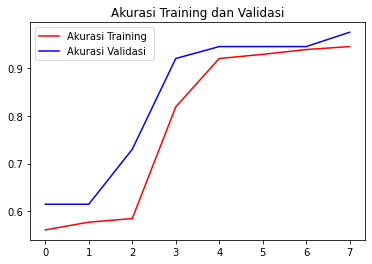

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt                                                   #Mengimpor modul matplotlib
acc = history.history['accuracy']                                                 #Nilai akurasi training
val_acc = history.history['val_accuracy']                                         #Nilai akurasi validasi
loss = history.history['loss']                                                    #Nilai loss training
val_loss = history.history['val_loss']                                            #Nilai loss validasi

epochs = range(len(acc))                                                          #Jumlah epoch

plt.plot(epochs, acc, 'r', label='Akurasi Training ')                             #Plot nilai akurasi training                     
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')                          #Plot nilai akurasi validasi
plt.title('Akurasi Training dan Validasi')                                        #Menamai gambar
plt.legend(loc=0)                                                                 #Menampilkan legenda
plt.figure()                                                                      
plt.show()

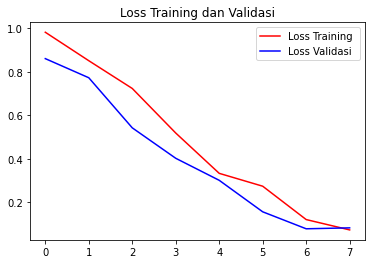

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Loss Training ')                             #Plot nilai akurasi training                     
plt.plot(epochs, val_loss, 'b', label='Loss Validasi')                          #Plot nilai akurasi validasi
plt.title('Loss Training dan Validasi')                                        #Menamai gambar
plt.legend(loc=0)                                                                 #Menampilkan legenda
plt.figure()                                                                      
plt.show()